# Titanic Kaggle Competition

The machine learning "Hello, world"

## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

### Metric
Your score is the percentage of passengers you correctly predict. This is known as accuracy.

## The Data

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
test = pd.read_csv('./data/test.csv', index_col="PassengerId")
data = pd.read_csv('./data/train.csv', index_col="PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

models = {
    "LinearSVC": LinearSVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

numerical = ["Age", "Fare"]
categorical = ["Embarked", "Sex", "Pclass"]

features = numerical + categorical

X = data[features]
y = data["Survived"]

In [7]:
np.random.random(42)


def preprocess(model):
    categorical_transformer = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ]
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", categorical_transformer, categorical),
        ]
    )
    return Pipeline(
        steps=[("preprocessor", preprocessor), ("classifier", model)]
    )


X_train, X_test, y_train, y_test = train_test_split(X, y,)
scores = {}

for name, model in models.items():
    clf = preprocess(model)
    clf.fit(X_train, y_train)
    scores[name] = clf.score(X_test, y_test)

scores

{'LinearSVC': 0.7623318385650224,
 'KNeighborsClassifier': 0.5515695067264574,
 'RandomForestClassifier': 0.7982062780269058}

In [9]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    'classifier__bootstrap': [True, False],
    'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

rf = preprocess(RandomForestClassifier())

grid_rf = RandomizedSearchCV(estimator=rf, param_distributions=grid, cv=5)
grid_rf.fit(X_train, y_train);


In [11]:
grid_rf.best_params_, grid_rf.best_score_

({'classifier__n_estimators': 600,
  'classifier__min_samples_split': 2,
  'classifier__min_samples_leaf': 1,
  'classifier__max_features': 'sqrt',
  'classifier__max_depth': 100,
  'classifier__bootstrap': True},
 0.8158455841095276)

In [12]:
rf = preprocess(
    RandomForestClassifier(
        n_estimators=600,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features="sqrt",
        max_depth=100,
        bootstrap=True
    )
)

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7982062780269058

In [17]:
from sklearn.metrics import classification_report, RocCurveDisplay

pd.DataFrame(classification_report(y_test, rf.predict(X_test), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.780347,0.860000,0.798206,0.820173,0.809279
recall,0.950704,0.530864,0.798206,0.740784,0.798206
f1-score,0.857143,0.656489,0.798206,0.756816,0.784259
support,142.000000,81.000000,0.798206,223.000000,223.000000


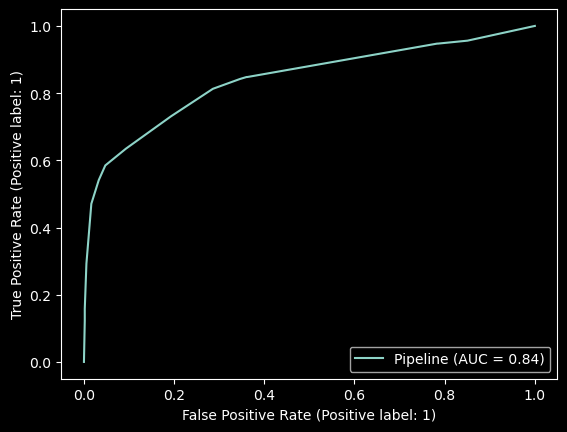

In [19]:
RocCurveDisplay.from_estimator(rf, X, y);